# MNIST Digit Classification with Convolutional Neural Network (CNN)

**Discipline(s):** Computer Vision, Deep Learning

colab에서 돌릴 경우, 런타임 유형을 GPU로 변경해주세요.

## 1. Import Statements

---



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random

## 2. Data Preprocessing

---



The first step is to preprocess our data.

In [6]:
BATCH_SIZE = 512
EPOCHS = 20
LEARNING_RATE = 0.001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset  = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 6.30MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 65.7kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 937kB/s] 


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [7]:
X_train = train_dataset.data
y_train = train_dataset.targets
X_test = test_dataset.data
y_test = test_dataset.targets

print("Training Images:", X_train.shape)  # [60000, 28, 28]
print("Testing Images:", X_test.shape)    # [10000, 28, 28]
print("Training Labels:", y_train.shape)  # [60000]
print("Test Labels:", y_test.shape)       # [10000]

Training Images: torch.Size([60000, 28, 28])
Testing Images: torch.Size([10000, 28, 28])
Training Labels: torch.Size([60000])
Test Labels: torch.Size([10000])


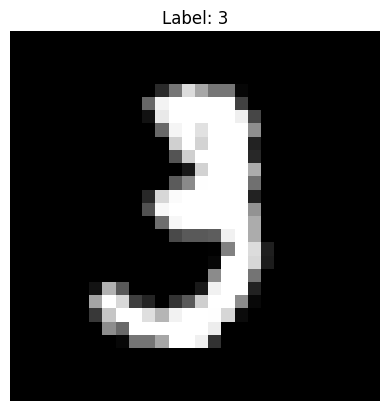

In [8]:
plt.imshow(X_train[10], cmap='gray')
plt.title(f"Label: {y_train[10].item()}")
plt.axis('off')
plt.show()

## 3. Convolutional Neural Network (CNN)

---



### 3.1. Define the Model

We then have to define our convolutional neural network.

In [9]:
# CNN 모델 정의 -> 차원이 어떻게 될지 생각하면서 코드 빈칸을 채워주세요.
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            # Conv2d(in_channels, out_channels, kernel_size, stride, padding)
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1), # (batch, 32, 28, 28)
            # activation function
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                                   # (batch, 32, 14, 14)

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # (batch, 64, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                                    # (batch, 64, 7, 7)

            # 모델을 더 깊게 쌓아도 됩니다.

            # fully connected layer 전, flatten 과정 필요
            nn.Flatten(),
            nn.Linear(64*7*7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

In [10]:
# 모델 준비
model = SimpleCNN().to(DEVICE)

Once our model is defined, we can compile it using the Adam optimizer and the categorical cross-entropy loss function.

In [11]:
criterion = nn.CrossEntropyLoss() # 분류 문제이므로
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

### 3.2. Train the Model

In [12]:
def train(model, loader):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for x, y in loader:
        x, y = x.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * y.size(0)
        correct += (output.argmax(dim=1) == y).sum().item()
        total += y.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

In [13]:
def evaluate(model, loader):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            output = model(x)
            loss = criterion(output, y)

            total_loss += loss.item() * y.size(0)
            correct += (output.argmax(dim=1) == y).sum().item()
            total += y.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

In [14]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = evaluate(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

[Epoch 1] Train Loss: 0.1779, Train Acc: 0.9460 | Test Loss: 0.0623, Test Acc: 0.9804
[Epoch 2] Train Loss: 0.0463, Train Acc: 0.9858 | Test Loss: 0.0359, Test Acc: 0.9876
[Epoch 3] Train Loss: 0.0317, Train Acc: 0.9902 | Test Loss: 0.0403, Test Acc: 0.9875
[Epoch 4] Train Loss: 0.0237, Train Acc: 0.9925 | Test Loss: 0.0324, Test Acc: 0.9895
[Epoch 5] Train Loss: 0.0183, Train Acc: 0.9940 | Test Loss: 0.0404, Test Acc: 0.9867
[Epoch 6] Train Loss: 0.0149, Train Acc: 0.9951 | Test Loss: 0.0247, Test Acc: 0.9922
[Epoch 7] Train Loss: 0.0106, Train Acc: 0.9963 | Test Loss: 0.0333, Test Acc: 0.9898
[Epoch 8] Train Loss: 0.0102, Train Acc: 0.9967 | Test Loss: 0.0330, Test Acc: 0.9908
[Epoch 9] Train Loss: 0.0086, Train Acc: 0.9970 | Test Loss: 0.0336, Test Acc: 0.9907
[Epoch 10] Train Loss: 0.0077, Train Acc: 0.9976 | Test Loss: 0.0291, Test Acc: 0.9922
[Epoch 11] Train Loss: 0.0047, Train Acc: 0.9983 | Test Loss: 0.0325, Test Acc: 0.9897
[Epoch 12] Train Loss: 0.0052, Train Acc: 0.9983 | T

### 3.3. 시각화

Finally, we can plot the curves.

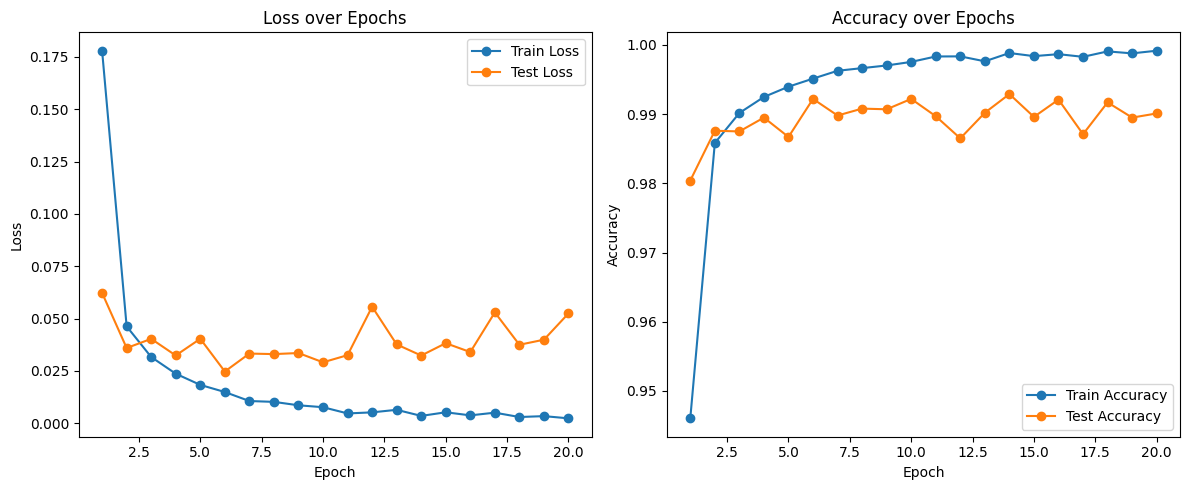

In [15]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

## 4. Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [16]:
def show_random_predictions(model, dataset, num_images=5):
    model.eval()

    indices = random.sample(range(len(dataset)), num_images)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])

    images = images.to(DEVICE)
    outputs = model(images)
    preds = outputs.argmax(dim=1)

    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title(f"GT: {labels[i].item()}\nPred: {preds[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Finally, we can show a random test image with its corresponding prediction.

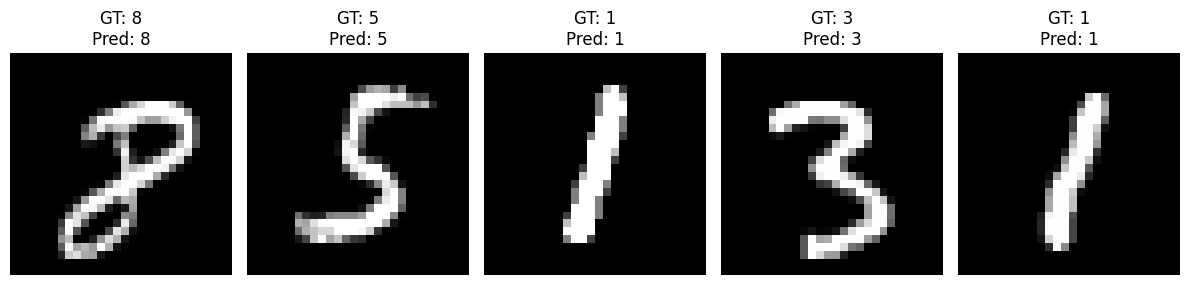

In [17]:
show_random_predictions(model, test_dataset, num_images=5)

## ResNet

In [20]:
BATCH_SIZE = 512
EPOCHS = 20
LEARNING_RATE = 0.001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [31]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        # Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        # 논문에서 kernel 3x3, stride=1, padding=1
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        # batch normalization
        self.bn1 = nn.BatchNorm2d(out_channels)
        # activation function
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # 추가로 layer 등을 더 구현하셔도 됩니다.


        # Skip connection: 채널 수가 다르면 어떤 convolution layer를 사용하는게 좋을지 생각해주세요.
        # 채널 수가 다를 경우 1x1 conv 사용
        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        identity = self.shortcut(x)

        # 빈칸 채우기
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)

        out += identity
        return self.relu(out)

In [47]:
class ResNetLike(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super().__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3, stride=1, padding=1),   # (batch, 16, 28, 28)
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)                                         # (batch, 16, 14, 14)
        )

        # layer 등을 추가로 더 쌓으셔도 됩니다.
        self.layer1 = ResidualBlock(16, 64)         # (batch, 64, 14, 14)
        self.layer2 = ResidualBlock(64, 64)         # (batch, 64, 14, 14)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1)) # (batch, 64, 1, 1)

        # 빈칸을 채워주세요.
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(64, num_classes) # 64: feature dimension, 10: MNIST Classes

    def forward(self, x):
        # 빈칸을 채워주세요.
        out = self.stem(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.avgpool(out)
        out = self.flatten(out)
        out = self.fc(out)
        return out

In [ ]:
model = ResNetLike(in_channels=1, num_classes=10).to(DEVICE)

In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [39]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = evaluate(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

[Epoch 1] Train Loss: 0.3400, Train Acc: 0.9382 | Test Loss: 0.1609, Test Acc: 0.9548
[Epoch 2] Train Loss: 0.0614, Train Acc: 0.9855 | Test Loss: 0.0501, Test Acc: 0.9872
[Epoch 3] Train Loss: 0.0401, Train Acc: 0.9896 | Test Loss: 0.0353, Test Acc: 0.9906
[Epoch 4] Train Loss: 0.0342, Train Acc: 0.9908 | Test Loss: 0.0694, Test Acc: 0.9772
[Epoch 5] Train Loss: 0.0279, Train Acc: 0.9921 | Test Loss: 0.0450, Test Acc: 0.9863
[Epoch 6] Train Loss: 0.0232, Train Acc: 0.9936 | Test Loss: 0.0325, Test Acc: 0.9911
[Epoch 7] Train Loss: 0.0208, Train Acc: 0.9938 | Test Loss: 0.0449, Test Acc: 0.9844
[Epoch 8] Train Loss: 0.0197, Train Acc: 0.9941 | Test Loss: 0.0295, Test Acc: 0.9912
[Epoch 9] Train Loss: 0.0176, Train Acc: 0.9948 | Test Loss: 0.0365, Test Acc: 0.9878
[Epoch 10] Train Loss: 0.0145, Train Acc: 0.9956 | Test Loss: 0.0317, Test Acc: 0.9894
[Epoch 11] Train Loss: 0.0151, Train Acc: 0.9951 | Test Loss: 0.0310, Test Acc: 0.9896
[Epoch 12] Train Loss: 0.0113, Train Acc: 0.9966 | T

### 시각화

Finally, we can plot the curves.

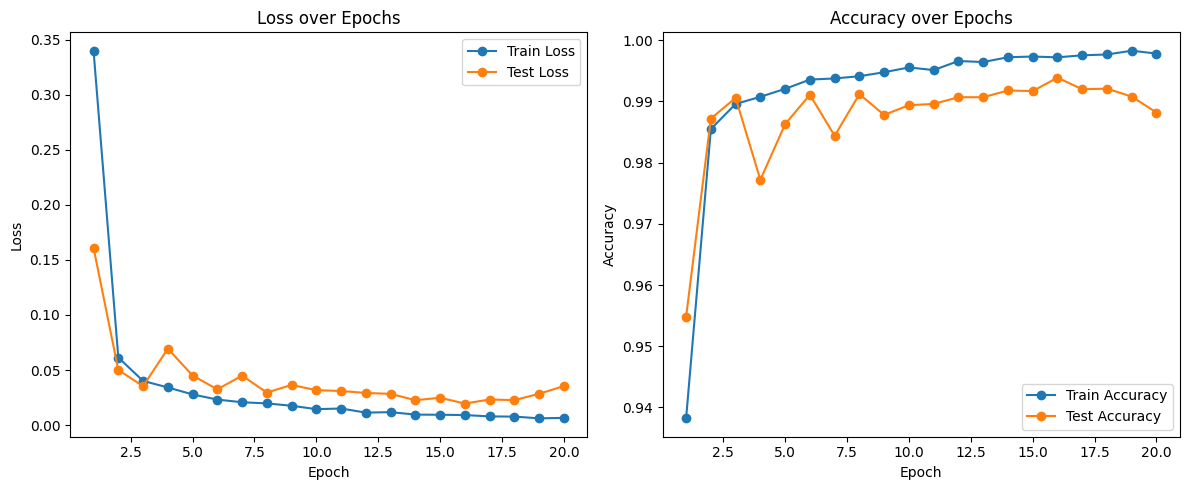

In [40]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

### Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [41]:
def show_random_predictions(model, dataset, num_images=5):
    model.eval()

    indices = random.sample(range(len(dataset)), num_images)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])

    images = images.to(DEVICE)
    outputs = model(images)
    preds = outputs.argmax(dim=1)

    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title(f"GT: {labels[i].item()}\nPred: {preds[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Finally, we can show a random test image with its corresponding prediction.

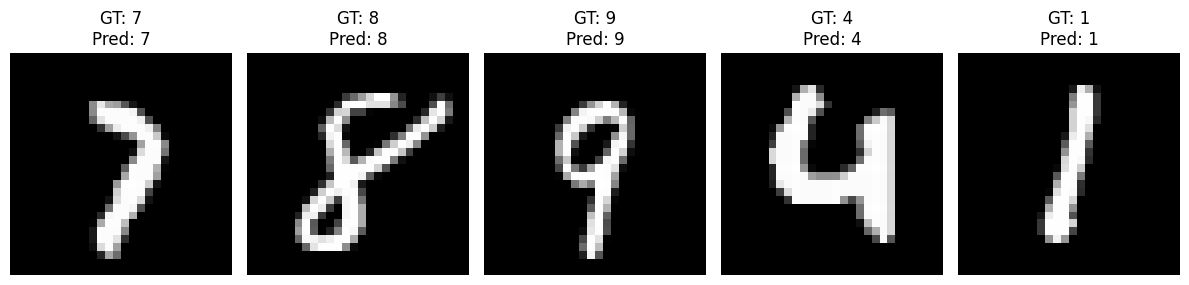

In [42]:
show_random_predictions(model, test_dataset, num_images=5)

# 다른 데이터셋으로도 진행해보기

### CIFAR-10으로 해보기

In [43]:
transform = transforms.Compose([
    transforms.ToTensor(),
    # CIFAR-10은 정규화값이 다름
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [44]:
trainset = datasets.CIFAR10(root='./data_cifar', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data_cifar', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

100%|██████████| 170M/170M [00:26<00:00, 6.41MB/s] 


Extracting ./data_cifar\cifar-10-python.tar.gz to ./data_cifar
Files already downloaded and verified


In [67]:
X_train = trainset.data
y_train = trainset.targets
X_test = testset.data
y_test = testset.targets

print("Training Images:", X_train.shape)  
print("Testing Images:", X_test.shape)    
print("Training Labels:", len(y_train))  
print("Test Labels:", len(y_test))       

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)
Training Labels: 50000
Test Labels: 10000


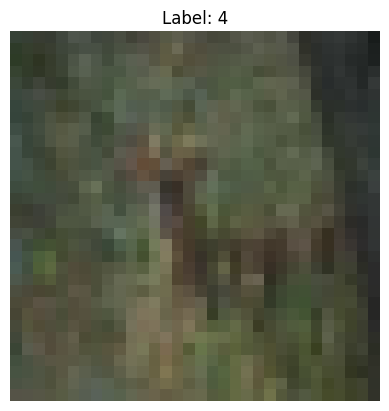

In [69]:
plt.imshow(X_train[10], cmap='gray')
plt.title(f"Label: {y_train[10]}")
plt.axis('off')
plt.show()

In [56]:
model = ResNetLike(in_channels=3, num_classes=10).to(DEVICE)

In [57]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [58]:
BATCH_SIZE = 256
EPOCHS = 50
LEARNING_RATE = 0.001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [59]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = evaluate(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

[Epoch 1] Train Loss: 1.6414, Train Acc: 0.4054 | Test Loss: 1.4301, Test Acc: 0.4608
[Epoch 2] Train Loss: 1.2664, Train Acc: 0.5539 | Test Loss: 1.2774, Test Acc: 0.5350
[Epoch 3] Train Loss: 1.0911, Train Acc: 0.6179 | Test Loss: 1.4365, Test Acc: 0.4796
[Epoch 4] Train Loss: 0.9843, Train Acc: 0.6561 | Test Loss: 1.0796, Test Acc: 0.6203
[Epoch 5] Train Loss: 0.9023, Train Acc: 0.6847 | Test Loss: 1.1328, Test Acc: 0.5965
[Epoch 6] Train Loss: 0.8448, Train Acc: 0.7078 | Test Loss: 0.9524, Test Acc: 0.6597
[Epoch 7] Train Loss: 0.7888, Train Acc: 0.7266 | Test Loss: 0.9600, Test Acc: 0.6633
[Epoch 8] Train Loss: 0.7509, Train Acc: 0.7408 | Test Loss: 0.9873, Test Acc: 0.6608
[Epoch 9] Train Loss: 0.7097, Train Acc: 0.7534 | Test Loss: 0.9700, Test Acc: 0.6641
[Epoch 10] Train Loss: 0.6776, Train Acc: 0.7647 | Test Loss: 0.9046, Test Acc: 0.6769
[Epoch 11] Train Loss: 0.6465, Train Acc: 0.7766 | Test Loss: 0.9244, Test Acc: 0.6768
[Epoch 12] Train Loss: 0.6194, Train Acc: 0.7864 | T

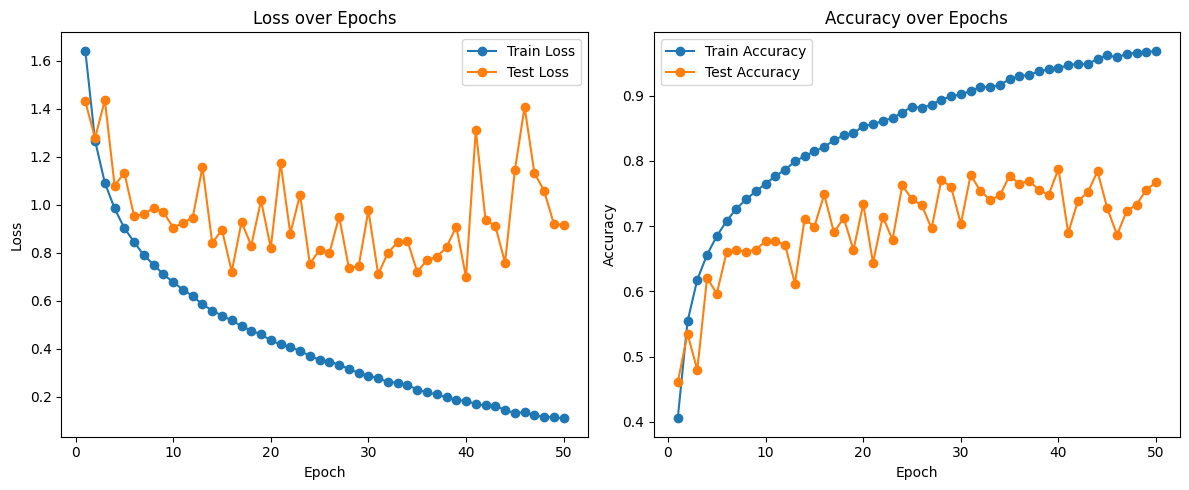

In [60]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

In [61]:
def show_random_predictions(model, dataset, num_images=5):
    model.eval()

    indices = random.sample(range(len(dataset)), num_images)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])

    images = images.to(DEVICE)
    with torch.no_grad():
        outputs = model(images)
        preds = outputs.argmax(dim=1)

    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        img = images[i].cpu()
        c = img.shape[0]
        plt.subplot(1, num_images, i+1)
        if c == 1:
            plt.imshow(img.squeeze(), cmap='gray')
        else:
            # (C, H, W) -> (H, W, C)
            plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
        plt.title(f"GT: {labels[i].item()}\nPred: {preds[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

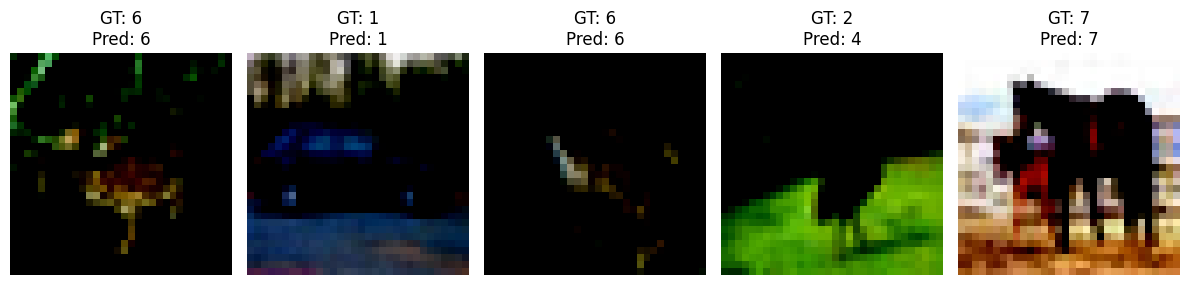

In [70]:
show_random_predictions(model, testset, num_images=5)

In [72]:
class ResidualBlock1(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        # Skip connection: 채널 수가 다르거나 stride가 2면 1x1 conv로 맞춤
        if in_channels != out_channels or stride != 1:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        identity = self.shortcut(x)
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += identity
        out = self.relu(out)
        return out

In [ ]:
class ResNet18(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super().__init__()
        self.in_channels = 64
        # 작은 입력(MNIST, CIFAR 등)에 맞춰 3x3 Conv로 시작(논문은 7x7)
        self.conv1 = nn.Conv2d(in_channels, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(2, 2)

        # 각 layer에 블록 쌓기
        self.layer1 = self._make_layer(64, 2, stride=1)
        self.layer2 = self._make_layer(128, 2, stride=2)
        self.layer3 = self._make_layer(256, 2, stride=2)
        self.layer4 = self._make_layer(512, 2, stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, out_channels, blocks, stride):
        layers = []
        # 첫 블록은 in_channels → out_channels, stride 지정
        layers.append(ResidualBlock1(self.in_channels, out_channels, stride))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(ResidualBlock1(self.in_channels, out_channels, stride=1))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.maxpool(out)

        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)

        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        out = self.fc(out)
        return out

In [80]:
model = ResNet18(in_channels=3, num_classes=10).to(DEVICE)

In [81]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [78]:
x, y = next(iter(train_loader))
print(x.shape, x.min().item(), x.max().item())
print(y.shape, y[:10])

torch.Size([512, 3, 32, 32]) -1.0 1.0
torch.Size([512]) tensor([6, 4, 1, 9, 4, 6, 8, 9, 8, 4])


In [82]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = evaluate(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

[Epoch 1] Train Loss: 1.3259, Train Acc: 0.5174 | Test Loss: 1.1750, Test Acc: 0.5958
[Epoch 2] Train Loss: 0.8322, Train Acc: 0.7027 | Test Loss: 0.8266, Test Acc: 0.7089
[Epoch 3] Train Loss: 0.6268, Train Acc: 0.7785 | Test Loss: 0.7988, Test Acc: 0.7319
[Epoch 4] Train Loss: 0.4701, Train Acc: 0.8360 | Test Loss: 0.7384, Test Acc: 0.7533
[Epoch 5] Train Loss: 0.3659, Train Acc: 0.8714 | Test Loss: 0.7270, Test Acc: 0.7668
[Epoch 6] Train Loss: 0.2617, Train Acc: 0.9086 | Test Loss: 0.7648, Test Acc: 0.7675
[Epoch 7] Train Loss: 0.1853, Train Acc: 0.9354 | Test Loss: 0.8635, Test Acc: 0.7640
[Epoch 8] Train Loss: 0.1444, Train Acc: 0.9493 | Test Loss: 0.8482, Test Acc: 0.7749
[Epoch 9] Train Loss: 0.1019, Train Acc: 0.9638 | Test Loss: 0.9314, Test Acc: 0.7717
[Epoch 10] Train Loss: 0.0919, Train Acc: 0.9678 | Test Loss: 0.9207, Test Acc: 0.7872
[Epoch 11] Train Loss: 0.0596, Train Acc: 0.9801 | Test Loss: 1.0560, Test Acc: 0.7788
[Epoch 12] Train Loss: 0.0638, Train Acc: 0.9772 | T

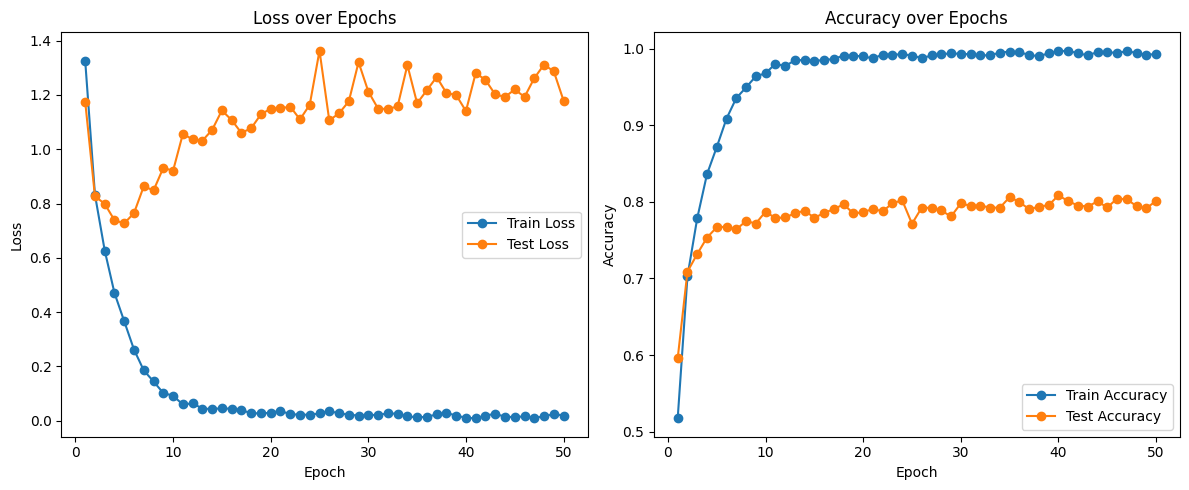

In [83]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

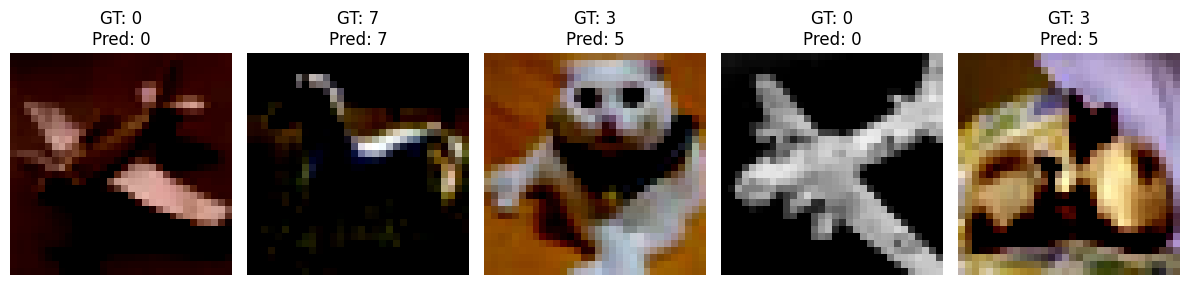

In [84]:
show_random_predictions(model, testset, num_images=5)